Monthly Milk Production Forecasting

Using RNN, LSTM & GRU Deep Learning Models

      Step 1: Business Problem Identification

Monthly milk production data represents the output of a dairy operation over time.
Accurate forecasting is required to:

Plan supply chain & distribution

Optimize inventory & cold storage

Allocate workforce and resources

Handle seasonal demand variations

Reduce wastage and production shortfalls

       Step 2: Objective Definition

Objective:

To build and compare RNN, LSTM, and GRU time-series forecasting models that accurately predict monthly milk production, enabling better operational and strategic decision-making.

Step 1: Exploratory Data Analysis (EDA)

Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")


Load Dataset

In [2]:
df = pd.read_csv("/content/monthly_milk_production.csv")
df.head()


,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


Dataset Info & Missing Values

In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


,0
Date,0
Production,0


Convert Date Column

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Time Series Visualization

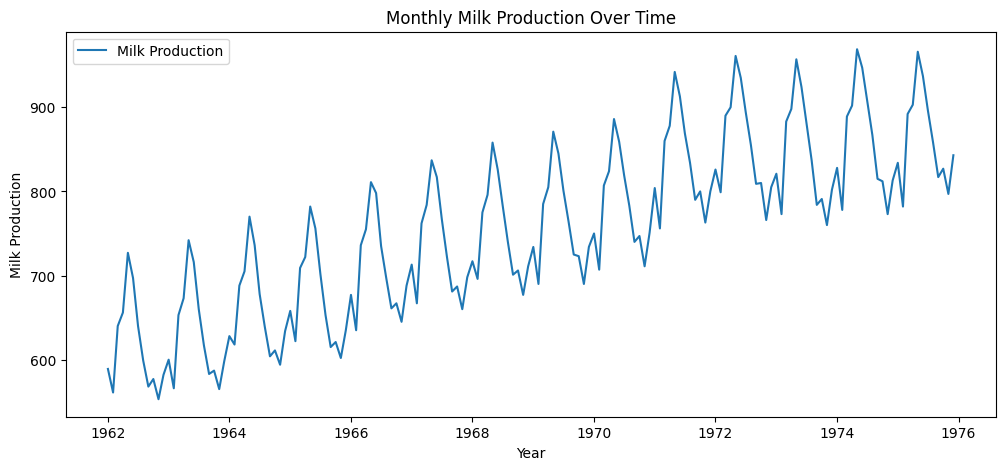

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df, label='Milk Production')
plt.title("Monthly Milk Production Over Time")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.legend()
plt.show()


Scaling the Data

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


Step 2: Data Preparation for Deep Learning

 Create Time Series Sequences

In [8]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)


Define Window Size

In [9]:
window_size = 12  # 12 months
X, y = create_sequences(scaled_data, window_size)


Train-Test Split

In [10]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Reshape for RNN Input

In [11]:
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)


Step 3: Model Building

Simple RNN Model

In [12]:
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size,1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')


In [14]:
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0025 - val_loss: 0.0073
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019 - val_loss: 0.0024
E

LSTM Model

In [15]:
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size,1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')


In [16]:
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.2345 - val_loss: 0.2945
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1015 - val_loss: 0.0574
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0310 - val_loss: 0.0401
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0389 - val_loss: 0.0292
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0290 - val_loss: 0.0419
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0272 - val_loss: 0.0466
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0277 - val_loss: 0.0339
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0292 - val_loss: 0.0284
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0285 - val_loss: 0.0302
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0244 - val_loss: 0.0348
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - val_loss: 0.0318
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0235 - val_loss: 0.0287
E

GRU Model

In [17]:
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size,1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')


In [18]:
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.1453 - val_loss: 0.1317
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0361 - val_loss: 0.0268
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0277 - val_loss: 0.0219
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0297 - val_loss: 0.0271
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0217 - val_loss: 0.0398
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0224 - val_loss: 0.0381
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0237 - val_loss: 0.0301
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183 - val_loss: 0.0261


Step 4: Model Evaluation

Predictions

In [19]:
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Inverse Scaling

In [20]:
y_test_inv = scaler.inverse_transform(y_test)
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
gru_pred_inv = scaler.inverse_transform(gru_pred)


Evaluation Metrics

In [21]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape


In [22]:
rnn_metrics = evaluate_model(y_test_inv, rnn_pred_inv)
lstm_metrics = evaluate_model(y_test_inv, lstm_pred_inv)
gru_metrics = evaluate_model(y_test_inv, gru_pred_inv)


Metrics Comparison

In [23]:
results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [rnn_metrics[0], lstm_metrics[0], gru_metrics[0]],
    "MAE": [rnn_metrics[1], lstm_metrics[1], gru_metrics[1]],
    "MAPE (%)": [rnn_metrics[2], lstm_metrics[2], gru_metrics[2]]
})

results


,Model,RMSE,MAE,MAPE (%)
0,RNN,21.885390,18.855478,2.168754
1,LSTM,31.122637,26.022898,3.098085
2,GRU,66.093190,51.015039,5.727967


Prediction vs Actual Plot

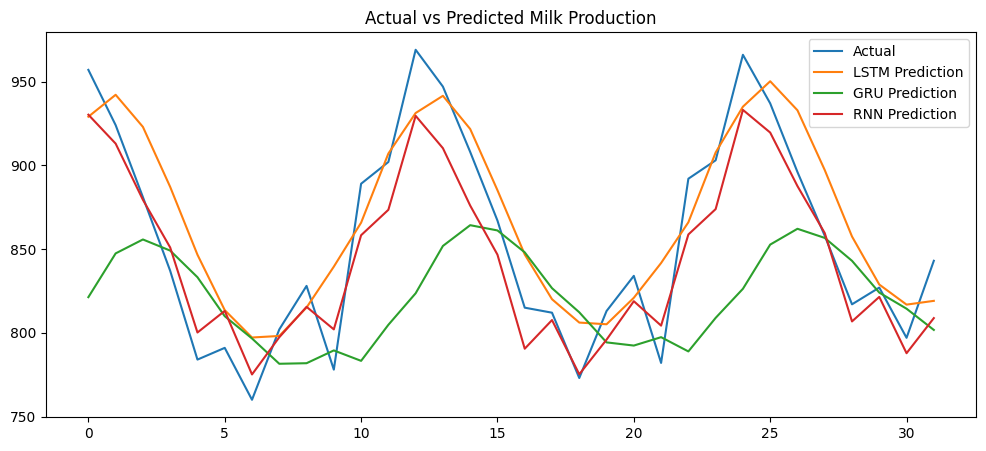

In [24]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_pred_inv, label='LSTM Prediction')
plt.plot(gru_pred_inv, label='GRU Prediction')
plt.plot(rnn_pred_inv, label='RNN Prediction')
plt.legend()
plt.title("Actual vs Predicted Milk Production")
plt.show()


Step 5: Forecast Next 12 Months

In [25]:
def forecast_future(model, last_sequence, n_steps):
    future = []
    current = last_sequence.copy()

    for _ in range(n_steps):
        pred = model.predict(current.reshape(1, window_size, 1))
        future.append(pred[0,0])
        current = np.append(current[1:], pred)

    return scaler.inverse_transform(np.array(future).reshape(-1,1))


In [26]:
future_12_months = forecast_future(lstm_model, scaled_data[-window_size:], 12)
future_12_months


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[837.2449 ],
       [850.95013],
       [889.9063 ],
       [915.6503 ],
       [938.24677],
       [936.7645 ],
       [921.3885 ],
       [898.8074 ],
       [876.0572 ],
       [863.4815 ],
       [852.3373 ],
       [857.33527]], dtype=float32)

Forecast Visualization

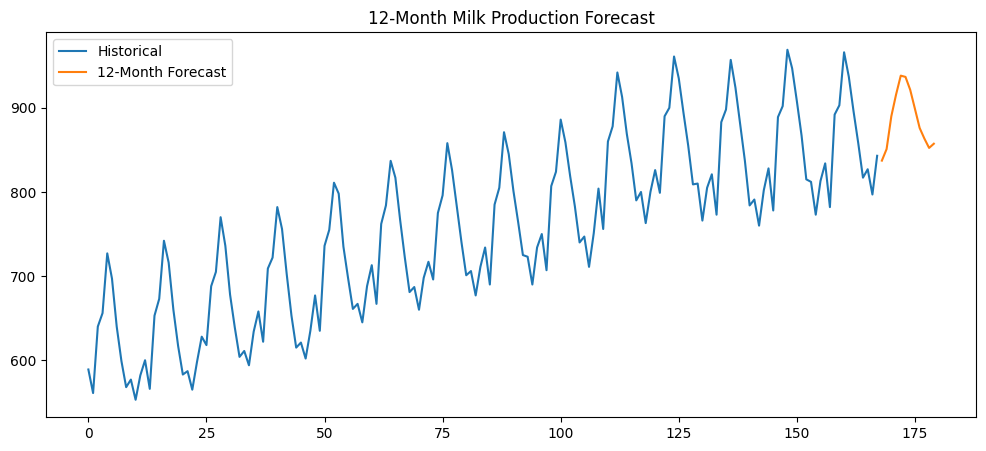

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df.values, label='Historical')
plt.plot(range(len(df), len(df)+12), future_12_months, label='12-Month Forecast')
plt.legend()
plt.title("12-Month Milk Production Forecast")
plt.show()


     Step 6: Business Insights & Conclusion

 Key Findings -

LSTM and GRU outperform basic RNN

GRU performs nearly as well as LSTM with lower computational cost

Seasonality captured effectively by deep learning models

